Since these problems are variations of Problem 2 from Hogg & Foreman-Mackey, I'll include my code for that problem here as well.

# Initial Sampler

In [1]:
import numpy as np
import matplotlib.pyplot as pl

In [ ]:
#Initialize a random number generator
rng = np.random.default_rng(3617)

In [ ]:
def gauss(x, u, s):
    '''
    Function to compute the gaussian probability density
    '''
    return np.exp(-(x-u)**2/2/s**2) / s / np.sqrt(2*np.pi)

def log_gauss(x, u, s):
    '''
    Function to compute the log of the gaussian probability density
    '''
    return -0.5 * (x-u)**2 / s**2 - 0.5*np.log(2*np.pi*s**2)


def sample(n, like, prop, init, rng, **kwargs): 
    '''
    MCMC sampler function
    -----------
    Inputs:
    ------
    n: number of steps in the chain
    like: function to compute likelihoods
    prop: proposal random number generator
    init: initial parameter value
    rng: random number generator to use
    kwargs: 
        prop_args: additional arguments to pass to the prop function
        like_args: additional arguments to pass to the likelihood function

    Returns:
    -------
    xlist: the MCMC chain
    '''

    #initialize the chain as an empty array
    xlist = np.empty(int(n))
    lik0 = like(init, *kwargs['like_args'])
    x0 = init
    i = 0

    #loop over the length of the chain
    while i < n:
        #propose a new value
        xprop = x0 + prop(*kwargs['prop_args'])

        #generate a random value [0,1]
        r = np.log(rng.random())

        #evaulate the likelihood of the proposed value
        lik1 = like(xprop, *kwargs['like_args'])

        #see if the likelihood ratio is greater than the random number
        if lik1-lik0 > r:
            #if so update the current likelihood value and parameter value
            x0 = xprop
            lik0 = lik1

        #store current parameter value
        xlist[i] = x0
        i+=1

    return xlist

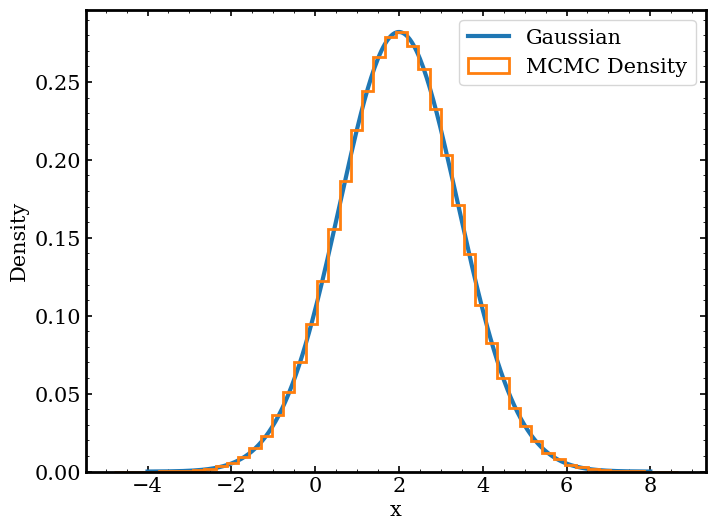

In [19]:
n_steps = 1e6
mu = 2
sig = np.sqrt(2)
prop_sig = 1
prop_mu = 0

chain = sample(n_steps, log_gauss, rng.normal, 0, rng, like_args=[mu, sig], prop_args=[prop_mu,prop_sig])

xs = np.linspace(-4, 8, 300)
ys = gauss(xs, mu, sig)


pl.figure(figsize=(8,6))
pl.plot(xs, ys, label="Gaussian")
pl.hist(chain[1000:], bins=50, histtype="step", density=True, lw=2, label="MCMC Density")
pl.xlabel("x")
pl.ylabel("Density")
pl.legend()
pl.show()

# Problem 1 (Hogg Problem 9)

In [ ]:
def logsample(n, like, prop, init, rng, **kwargs): 
    '''
    MCMC sampler function for sampling in the logspace of the parameter

    The only difference between this function and sample is that this one
     assumes x is the log of the parameter value so it stores exp(x) instead
     of x directly
    -----------
    Inputs:
    ------
    n: number of steps in the chain
    like: function to compute likelihoods
    prop: proposal random number generator
    init: initial parameter value
    rng: random number generator to use
    kwargs: 
        prop_args: additional arguments to pass to the prop function
        like_args: additional arguments to pass to the likelihood function

    Returns:
    -------
    xlist: the MCMC chain
    '''

    #initialize the chain as an empty array
    xlist = np.empty(int(n))
    lik0 = like(init, *kwargs['like_args'])
    x0 = init
    i = 0

    #loop over the length of the chain
    while i < n_steps:

        #propose a new value
        xprop = x0 + prop(*kwargs['prop_args'])

        #generate a random value [0,1]
        r = np.log(rng.random())

        #evaulate the likelihood of the proposed value
        lik1 = like(xprop, *kwargs['like_args'])


        #see if the likelihood ratio is greater than the random number
        if lik1-lik0 > r:
            #if so update the current likelihood value and parameter value
            x0 = xprop
            lik0 = lik1

        #store exp(current parameter value)
        xlist[i] = np.exp(x0)
        i+=1

    return xlist

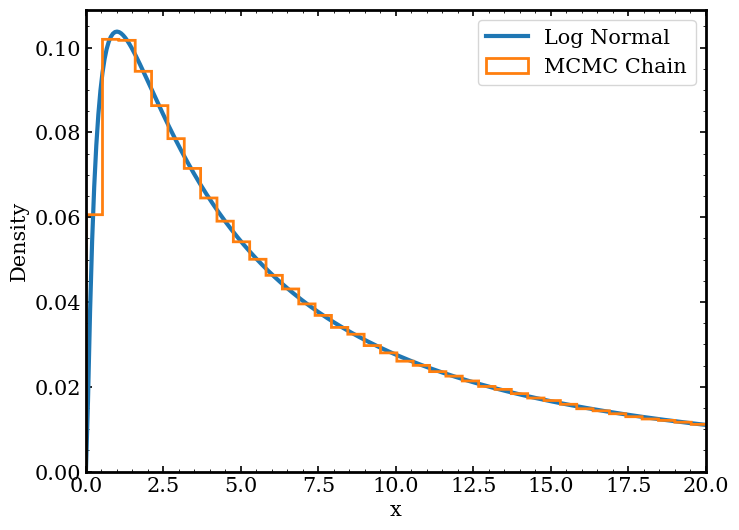

In [ ]:
n_steps = 2e6
mu = 2
sig = np.sqrt(2)
prop_sig = 1
prop_mu = 0

logchain = logsample(n_steps, log_gauss, rng.normal, 1, rng, like_args=[mu, sig], prop_args=[prop_mu,prop_sig])

xs = np.linspace(1e-10, 20, 300)

#convert a gaussian distribution to a lognormal distribution
ys = gauss(np.log(xs), mu, sig)/xs


pl.figure(figsize=(8,6))
pl.plot(xs, ys, label="Log Normal")
pl.hist(logchain, bins=8000, histtype="step", density=True, lw=2, label="MCMC Chain")
pl.xlim(0,20)
pl.xlabel("x")
pl.ylabel("Density")
pl.legend()
pl.show()

We are now sampling log(x) instead of x, but the only thing that functionally changes in the computation is that we exponentiate all the parameter values we sample. We are simply changing our interpretation of the parameter to be log(x) rather than x. Therefore, we can recreate the same distribution simply by taking the exponential of the chain we created for the original Gaussian sampling problem. The comparison is shown in the plot below. 

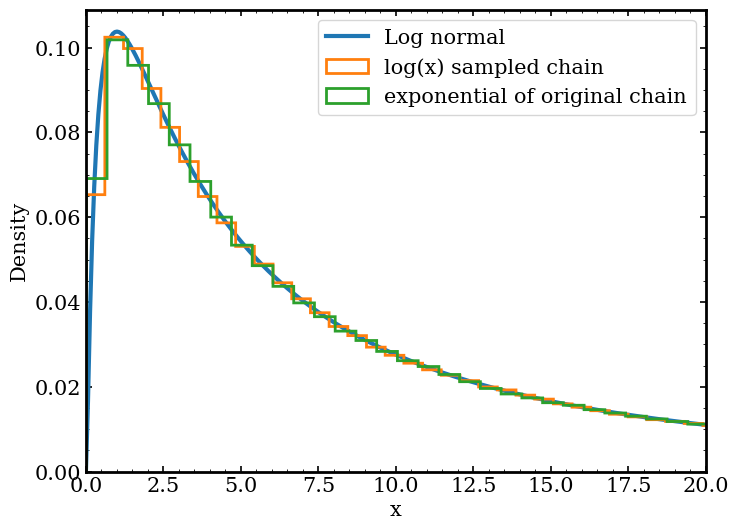

In [10]:
xs = np.linspace(1e-10, 20, 300)
ys = gauss(np.log(xs), mu, sig)/xs


pl.figure(figsize=(8,6))
pl.plot(xs, ys, label="Log normal")
pl.hist(logchain, bins=7000, histtype="step", density=True, lw=2, label="log(x) sampled chain")
pl.hist(np.exp(chain), bins=7000, histtype="step", density=True, lw=2, label="exponential of original chain")
pl.xlim(0,20)
pl.xlabel("x")
pl.ylabel("Density")
pl.legend()
pl.show()

As seen in the above results, after changing to sampling in log(x) instead of x, we are no longer sampling the Gaussian distribution but rather the log normal distribution. That is a distribution that is Gaussian distributed in log space. This makes sense given the change that we made.

# Problem 2 (Hogg Problem 10)

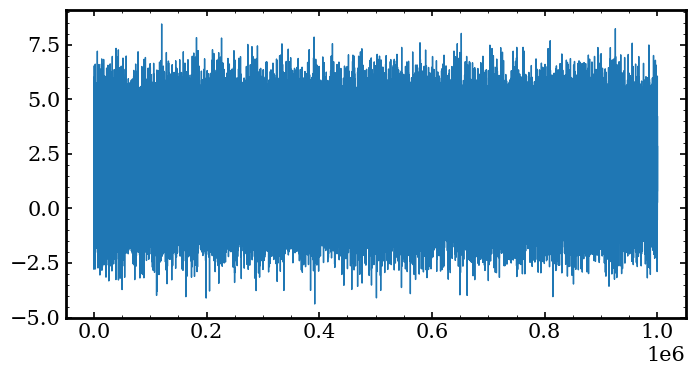

Mean: 2.002788627188814, std: 1.4127526232739664


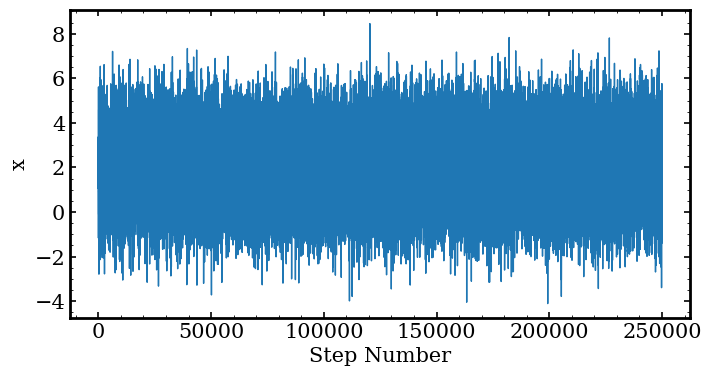

Mean: 2.0184824388160054, std: 1.421964235431185


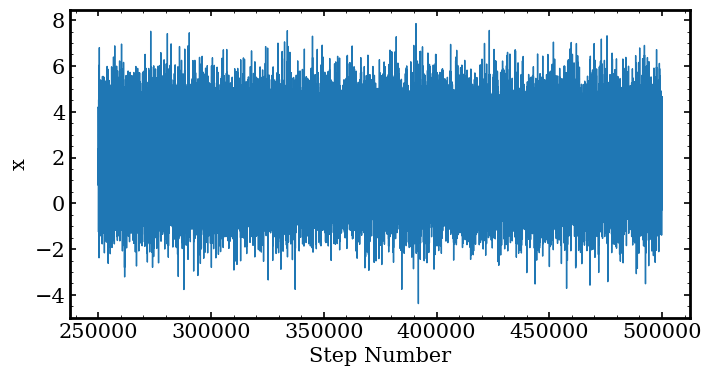

Mean: 2.0051349005583132, std: 1.4276856113393401


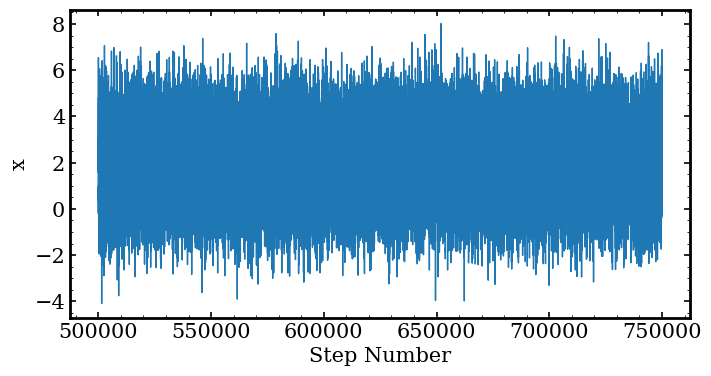

Mean: 1.9963377339874435, std: 1.4160299342936213


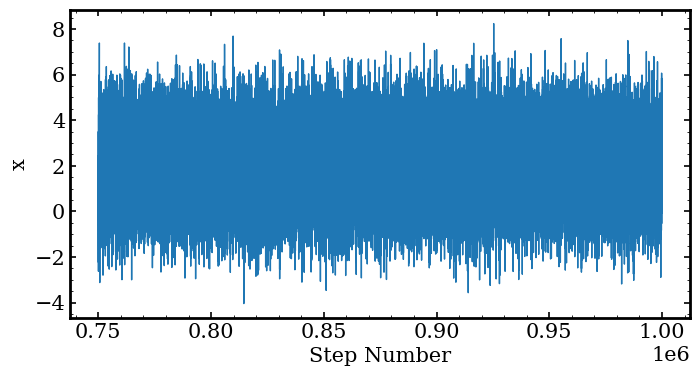

In [11]:
step = np.arange(1,len(chain)+1)

seg = np.arange(len(chain)/4, dtype=int)

pl.figure(figsize=(8,4))

#plotting the whole chain
pl.plot(step, chain, lw=1)
pl.show()


#plotting the 4 chain segments and their means/stds
for i in range(4):
    print(f'Mean: {np.mean(chain[seg])}, std: {np.std(chain[seg])}')
    pl.figure(figsize=(8,4))
    pl.plot(step[seg], chain[seg], lw=1)
    pl.xlabel("Step Number")
    pl.ylabel("x")
    pl.show()
    seg += int(len(chain)//4)



Above are plotted the original chain and the 4 quarter segments of the chain. Above the segmented chains are the sample mean and standard deviation of those segments. We know the population mean is 2 and standard deviation $\sqrt{2}$ ~ 1.414. All 4 segments of the chain have very accurately converged to these values to at least the second decimal place. This is a demonstration of how quickly MCMC can converge to the sampled distribution. However, it should be noted that the initial guess was well within the reach of the distribution and so did not require much burn in by construction. The plot below shows the first 1000 steps of the chain along with the respective sample mean and standard deviation. It is clear that only 0.1% through the run, the distribution is not converged, with a mean that is off by about 15% and a standard deviation off by about 5%. They aren't terribly wrong, but certainly worse than the longer segements of the chain shown above. This is again likely a result of starting the chain in a high probability region of the sampled distribution.

Mean: 2.3802074941283546, std: 1.337812012067947


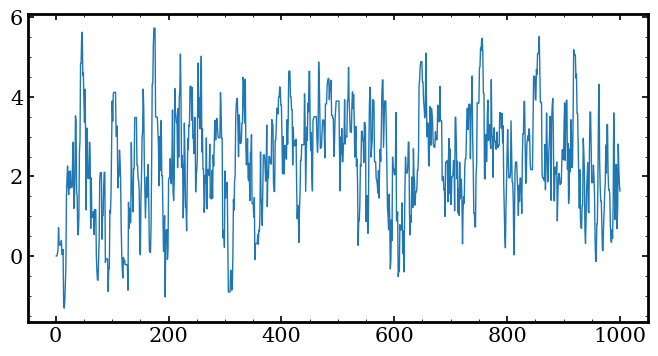

In [215]:
print(f'Mean: {np.mean(chain[:1000])}, std: {np.std(chain[:1000])}')
pl.figure(figsize=(8,4))
pl.plot(step[:1000], chain[:1000], lw=1)
pl.show()

# Problem 3 (Hogg problem 11)


The autocorrelation function can be computed efficiently in Fourier space. It turns out that it is simply $F(f)F^*(f)$ where $F(f)$ is the Fourier transform of $X(t)$, the time series. The alternative computation would be to shift the signal across itself and sum the pairwise products of every vertical pair (one value from the original chain and the other from the shifted chain). The fast Fourier transform algorithm makes the Fourier transform approach many order of magnitude faster than the brute force approach.

In [ ]:
def correlate(x):
    '''
    Compute the autocorrelation function of the discrete signal x
    '''
    #compute the fft of the chain
    f = np.fft.fft(x)

    #compute the complex conjugate of the fft
    fc = np.conjugate(f)

    #multiply the fft with its complex conjugate
    fac = f*fc

    #invert the fft and take only the real part of the result
    ac = np.fft.ifft(fac).real

    #some normalizaiton to get the autocovariance
    ac = ac / len(x) - np.mean(x)**2

    #bounding result from -1 to 1 by dividing by the 0 lag covariance
    return ac/ac[0]

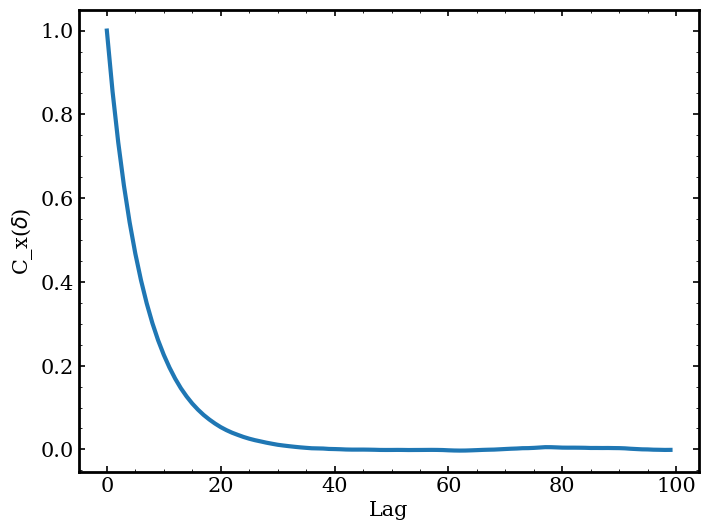

In [35]:
acf = correlate(chain)

pl.figure(figsize=(8,6))
pl.plot(np.arange(100), acf[:100])
pl.xlabel("Lag")
pl.ylabel(r"C_x($\delta$)")
pl.show()

In [36]:
#double the variance
sig = np.sqrt(4)
chain4 = sample(n_steps, log_gauss, rng.normal, 0, rng, like_args=[mu, sig], prop_args=[prop_mu,prop_sig])
acf4 = correlate(chain4)

#half the variance
sig = np.sqrt(1)
chain1 = sample(n_steps, log_gauss, rng.normal, 0, rng, like_args=[mu, sig], prop_args=[prop_mu,prop_sig])
acf1 = correlate(chain1)

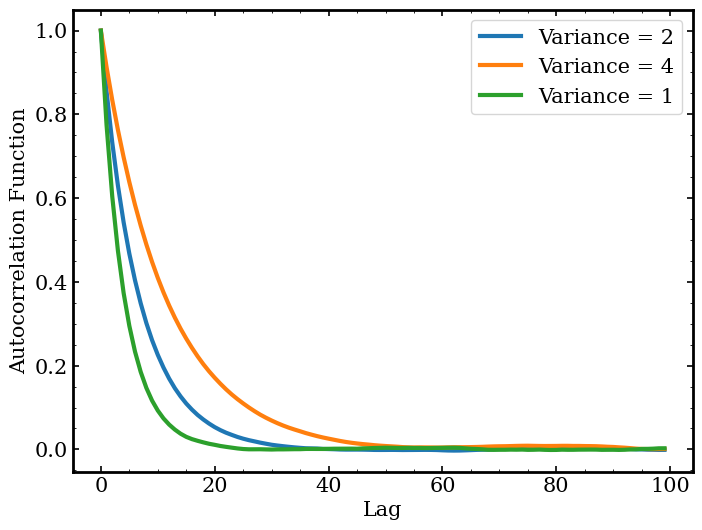

In [37]:
pl.figure(figsize=(8,6))
pl.plot(np.arange(100), acf[:100], label="Variance = 2")
pl.xlabel("Lag")
pl.ylabel("Autocorrelation Function")

#double the variance
sig = np.sqrt(4)
pl.plot(np.arange(100), acf4[:100], label="Variance = 4")

#half the variance
sig = np.sqrt(1)
pl.plot(np.arange(100), acf1[:100], label="Variance = 1")

pl.legend()

pl.show()

The above plot compares the autocorrelation functions of chains sampling a Gaussian of 3 different widths. Technically, what I've shown is the autocovariance function, but this is the form that matches with the Hogg paper. Clearly, the lag times with significant correlation increase as the width of the sampled Gaussian increases. That is because given the same step sizes, the chain will stay closer to its current value (in relative terms) in a wider chain than in a thinner chain. That is, for a wider chain, we do not traverse the entire width of the Gaussian in as few steps as we would for a thin Gaussian. That means that the chain might take longer to return to its current value after it leaves it, for example.